In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('./train.csv')
# test = pd.read_csv('./data/test.csv')
print(train.shape)
train.head()

(1095, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000


# Data analysis
## 1. Check missing value

In [15]:
# 觀察缺失值狀況
# 有許多特徵的缺失值數量已經超過了資料總數的一半，但缺失值有時候其意義不單單只是缺失，也代表某些意義
missing = train.isnull()
missing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [12]:
missing.index

RangeIndex(start=0, stop=1095, step=1)

## 2. Check the probability distribution of the target - SalePrice

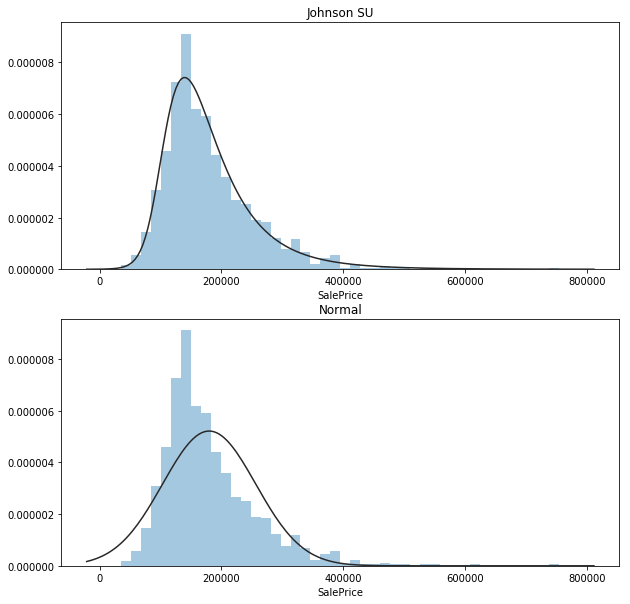

In [13]:
# 可以發現預測目標並不符合常態分佈
y = train['SalePrice']
JS = stats.johnsonsu.fit
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1, title = 'Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.subplot(2, 1, 2, title = 'Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.show()

## 3. Check the type of features(continual or discrete)

In [14]:
# 判斷每個特徵的類型
train.dtypes[:20]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
dtype: object

C:\Users\HAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [9]:
def plot_xy(x, y, x_label, y_label, fontsize = 12):
    plt.scatter(x, y)
    plt.ylabel(y_label, fontsize = fontsize)
    plt.xlabel(x_label, fontsize = fontsize)



LE = LabelEncoder()
y = train['SalePrice']
y_label = 'SalePrice'

## 3-1-1. Analyze continual features

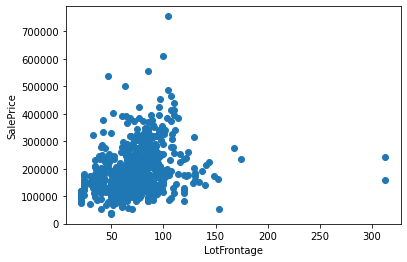

In [11]:
feature = 'LotFrontage'
plt.scatter(train[feature], y)
plt.xlabel(feature)
plt.ylabel(y_label)
plt.show()

## 3-1-2. Spearman correlation and null hypothesis

In [ ]:
features = continual + ['SalePrice']
corr, p_val = stats.spearmanr(train[features], nan_policy = 'omit')

In [ ]:
plt.figure(figsize = (20, 8), dpi = 100)

plt.subplot(1, 2, 1)
plt.title('Spearman correlation heatmap')
sns.heatmap(corr, xticklabels = features, yticklabels = features)

plt.subplot(1, 2, 2)
plt.title('P Value heatmap')
sns.heatmap(p_val, xticklabels = features, yticklabels = features)

plt.show()

## 3-2-1. Analyze discrete features by histogram

In [ ]:
plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    train[feature].hist()
    plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()

## 3-2-2. Analyze discrete features

In [ ]:
plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    sns.boxplot(x = train[feature], y = y)
    # plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()